# Tutorial Code

Code taken and slightly modified from [this data science article](https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d).

## Load Data

11493376/11490434 [==============================] - 0s 0us/step
8
Data shape: (60000, 28, 28)


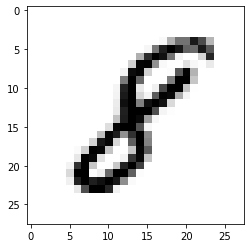

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

#%matplotlib inline # Only use this if using iPython
image_index = 7777 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

print('Data shape:', x_train.shape)

## Transform and Normalize Images

In [2]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


## Build The CNN

In [3]:
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Using TensorFlow backend.


## Train and Test Model

### Train

In [4]:
model.fit(x=x_train,y=y_train, epochs=10)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/10





60000/60000 [==============================] - 19s 317us/step - loss: 0.2175 - acc: 0.9344
Epoch 2/10
60000/60000 [==============================] - 12s 205us/step - loss: 0.0891 - acc: 0.9728
Epoch 3/10
60000/60000 [==============================] - 12s 200us/step - loss: 0.0634 - acc: 0.9806
Epoch 4/10
60000/60000 [==============================] - 12s 202us/step - loss: 0.0494 - acc: 0.9844
Epoch 5/10
60000/60000 [==============================] - 12s 199us/step - loss: 0.0392 - acc: 0.9867
Epoch 6/10
60000/60000 [==============================] - 12s 200us/step - loss: 0.0326 - acc: 0.9896
Epoch 7/10
60000/60000 [==============================] - 12s 200us/step - loss: 0.0248 - acc: 0.9913
Epoch 8/10
60000/60000 [==============================] - 12s 197us/step - loss: 0.0252 - acc: 0.9915
Epoch 9/10
60000/60000 [==============================] - 12s 200us/step - loss: 0

### Test

In [5]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 78us/step


[0.06166637116267811, 0.9855]

### Predict an Individual Digit

9


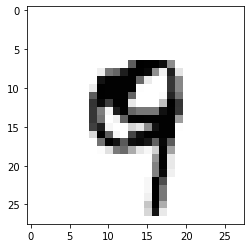

In [6]:
image_index = 4444
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

# Kaggle Model

Original code taken from [this Kaggle article](https://)

### Set Up

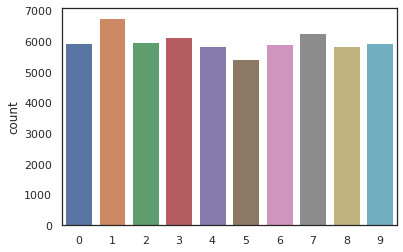

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


sns.set(style='white', context='notebook', palette='deep')

Y_train = y_train

X_train = x_train

X_val = x_test

Y_val = y_test

g = sns.countplot(Y_train)

#Y_train.value_counts()

### Create Model

In [0]:
# Set the CNN model 
# my CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

# Define the optimizer
#optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

# Compile the model
model.compile(optimizer = 'adam' , loss = "sparse_categorical_crossentropy", metrics=["accuracy"])

### Misc. Prep For Training

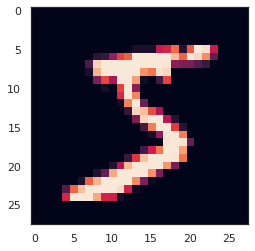

In [32]:
# Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
#Y_train = to_categorical(Y_train, num_classes = 10)

Y_train[2]

g = plt.imshow(X_train[0][:,:,0])

# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

# Introduce noise to prevent overfitting
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

epochs = 30 # Turn epochs to 30 to get 0.9967 accuracy
batch_size = 86

### Train Model

In [51]:
# Fit the model
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

Epoch 1/30
 - 28s - loss: 0.3186 - acc: 0.8985 - val_loss: 0.0339 - val_acc: 0.9880
Epoch 2/30
 - 25s - loss: 0.1047 - acc: 0.9690 - val_loss: 0.0242 - val_acc: 0.9918
Epoch 3/30
 - 26s - loss: 0.0797 - acc: 0.9763 - val_loss: 0.0241 - val_acc: 0.9917
Epoch 4/30
 - 26s - loss: 0.0688 - acc: 0.9792 - val_loss: 0.0262 - val_acc: 0.9914
Epoch 5/30
 - 25s - loss: 0.0609 - acc: 0.9819 - val_loss: 0.0176 - val_acc: 0.9939
Epoch 6/30
 - 26s - loss: 0.0572 - acc: 0.9831 - val_loss: 0.0142 - val_acc: 0.9950
Epoch 7/30
 - 26s - loss: 0.0493 - acc: 0.9852 - val_loss: 0.0195 - val_acc: 0.9932
Epoch 8/30
 - 26s - loss: 0.0479 - acc: 0.9862 - val_loss: 0.0149 - val_acc: 0.9948
Epoch 9/30
 - 25s - loss: 0.0469 - acc: 0.9865 - val_loss: 0.0188 - val_acc: 0.9943

Epoch 00009: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 10/30
 - 26s - loss: 0.0347 - acc: 0.9897 - val_loss: 0.0116 - val_acc: 0.9960
Epoch 11/30
 - 26s - loss: 0.0311 - acc: 0.9905 - val_loss: 0.0107 - val_acc: 

## Create Predictions

In [55]:
train_predictions = model.predict(X_train).argmax(axis=1)
test_predictions = model.predict(X_val).argmax(axis=1)

print(len(train_predictions), len(test_predictions))
print(train_predictions)
print(test_predictions)

60000 10000
[5 0 4 ... 5 6 8]
[7 2 1 ... 4 5 6]


## Prep For Submission To Kaggle

In [66]:
all_predictions = np.concatenate((train_predictions, test_predictions))

print(len(all_predictions))

submission = pd.DataFrame({'Id': [str(float(id)) for id in range(1, len(all_predictions))] + [""], 'Category': all_predictions})

submission.to_csv('submission.csv', index=False)

#If using in Google Colab, run the following line and copy the output to a local file.
!cat submission.csv

70000
Id,Category
1.0,5
2.0,0
3.0,4
4.0,1
5.0,9
6.0,2
7.0,1
8.0,3
9.0,1
10.0,4
11.0,3
12.0,5
13.0,3
14.0,6
15.0,1
16.0,7
17.0,2
18.0,8
19.0,6
20.0,9
21.0,4
22.0,0
23.0,9
24.0,1
25.0,1
26.0,2
27.0,4
28.0,3
29.0,2
30.0,7
31.0,3
32.0,8
33.0,6
34.0,9
35.0,0
36.0,5
37.0,6
38.0,0
39.0,7
40.0,6
41.0,1
42.0,8
43.0,7
44.0,9
45.0,3
46.0,9
47.0,8
48.0,5
49.0,9
50.0,3
51.0,3
52.0,0
53.0,7
54.0,4
55.0,9
56.0,8
57.0,0
58.0,9
59.0,4
60.0,1
61.0,4
62.0,4
63.0,6
64.0,0
65.0,4
66.0,5
67.0,6
68.0,1
69.0,0
70.0,0
71.0,1
72.0,7
73.0,1
74.0,6
75.0,3
76.0,0
77.0,2
78.0,1
79.0,1
80.0,7
81.0,9
82.0,0
83.0,2
84.0,6
85.0,7
86.0,8
87.0,3
88.0,9
89.0,0
90.0,4
91.0,6
92.0,7
93.0,4
94.0,6
95.0,8
96.0,0
97.0,7
98.0,8
99.0,3
100.0,1
101.0,5
102.0,7
103.0,1
104.0,7
105.0,1
106.0,1
107.0,6
108.0,3
109.0,0
110.0,2
111.0,9
112.0,3
113.0,1
114.0,1
115.0,0
116.0,4
117.0,9
118.0,2
119.0,0
120.0,0
121.0,2
122.0,0
123.0,2
124.0,7
125.0,1
126.0,8
127.0,6
128.0,4
129.0,1
130.0,6
131.0,3
132.0,4
133.0,5
134.0,9
135.0,1
136.0,3
13